# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sts

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create lists to hold values
City_ID = []
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []


In [4]:
# Declare the url
url = "http://api.openweathermap.org/data/2.5/weather?"

print(f"Beginning Data Retrieval")
print(f"------------------------")

# Loop through the cities
for city in cities:
    
    query_url = url + "appid=" + weather_api_key + "&units=imperial" + "&q=" + city
    city_weather = requests.get(query_url).json()
    
    try: 
        City.append(city_weather['name'])
        Cloudiness.append(city_weather['clouds']['all'])
        Country.append(city_weather['sys']['country'])
        Date.append(city_weather['dt'])
        Humidity.append(city_weather['main']['humidity'])
        Lat.append(city_weather['coord']['lat'])
        Lng.append(city_weather['coord']['lon'])
        Max_Temp.append(city_weather['main']['temp_max'])
        Wind_Speed.append(city_weather['wind']['speed'])
        City_ID.append({cities.index(city)})
        print(f'Processing: {cities.index(city)} | {city}')
    except:
        print(f"We could not find {city}")
        pass

print(f"------------------------")    
print(f"Data Retrieval Complete")
print(f"------------------------")

Beginning Data Retrieval
------------------------
Processing: 0 | slobozia
Processing: 1 | ushuaia
Processing: 2 | mar del plata
Processing: 3 | avarua
Processing: 4 | punta arenas
Processing: 5 | vestmannaeyjar
Processing: 6 | poyarkovo
Processing: 7 | chuy
Processing: 8 | sitka
We could not find taolanaro
Processing: 10 | puerto ayora
Processing: 11 | thompson
Processing: 12 | egvekinot
We could not find nizhneyansk
Processing: 14 | zhemtala
Processing: 15 | wenling
Processing: 16 | praia
Processing: 17 | mataura
Processing: 18 | longyearbyen
Processing: 19 | lagoa
Processing: 20 | ilulissat
Processing: 21 | hobart
Processing: 22 | karaman
Processing: 23 | georgetown
Processing: 24 | oyama
Processing: 25 | port elizabeth
We could not find tekax
Processing: 27 | nchelenge
Processing: 28 | dubbo
Processing: 29 | saint-philippe
Processing: 30 | hambantota
We could not find samusu
Processing: 32 | albany
We could not find sorvag
Processing: 34 | husavik
Processing: 35 | isiro
Processing:

Processing: 301 | dhidhdhoo
Processing: 302 | imbituba
Processing: 303 | pacific grove
Processing: 304 | faanui
Processing: 305 | betamcherla
We could not find mys shmidta
Processing: 307 | honiara
Processing: 308 | college
Processing: 309 | zhigansk
Processing: 310 | sulangan
Processing: 311 | roma
Processing: 312 | riyadh
Processing: 313 | yulara
Processing: 314 | jinxiang
Processing: 315 | champua
Processing: 316 | kottagudem
Processing: 317 | diamantino
Processing: 318 | broome
Processing: 319 | riberalta
Processing: 320 | cabo san lucas
Processing: 321 | waddan
Processing: 322 | umm kaddadah
Processing: 323 | rio gallegos
Processing: 324 | constantine
We could not find warqla
Processing: 326 | ludvika
Processing: 327 | castro
Processing: 328 | xingyi
Processing: 329 | faya
Processing: 330 | maningrida
Processing: 331 | dunedin
Processing: 332 | trinidad
Processing: 333 | idritsa
Processing: 334 | vostok
Processing: 335 | manta
Processing: 336 | samarai
We could not find temaraia
P

Processing: 603 | miri
Processing: 604 | maragogi
Processing: 605 | kaka
Processing: 606 | ritchie
Processing: 607 | carmen
Processing: 608 | paamiut
Processing: 609 | juan lacaze
Processing: 610 | dudinka
Processing: 611 | gryazovets
Processing: 612 | pasighat
We could not find ilinsko-podomskoye
Processing: 614 | ballitoville
Processing: 615 | marzuq
Processing: 616 | waipawa
We could not find quetzaltepec
We could not find dolbeau
Processing: 619 | loukhi
Processing: 620 | ouesso
Processing: 621 | benicarlo
We could not find scottsburgh
Processing: 623 | great yarmouth
Processing: 624 | kasongo-lunda
Processing: 625 | jiblah
We could not find cheuskiny
Processing: 627 | dicamay
Processing: 628 | miedzychod
Processing: 629 | cravo norte
Processing: 630 | barra
------------------------
Data Retrieval Complete
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a DataFrame to store the values from the API calls
city_data_df = pd.DataFrame({
    "City ID": City_ID,
    "City": City,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
    "Wind Speed": Wind_Speed,
    "Country": Country,
    "Date": Date})

city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit = "s")


city_data_df

,City ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,{0},Slobozia,46.7281,29.7078,23.00,93,90,12.66,MD,2021-02-07 18:34:53
1,{1},Ushuaia,-54.8000,-68.3000,59.00,47,40,12.66,AR,2021-02-07 18:34:53
2,{2},Mar del Plata,-38.0023,-57.5575,60.80,88,90,25.32,AR,2021-02-07 18:33:49
3,{3},Avarua,-21.2078,-159.7750,80.60,83,20,5.75,CK,2021-02-07 18:34:53
4,{4},Punta Arenas,-53.1500,-70.9167,69.80,23,0,12.66,CL,2021-02-07 18:31:06
...,...,...,...,...,...,...,...,...,...,...
573,{625},Jiblah,13.9216,44.1467,58.15,74,22,2.13,YE,2021-02-07 18:36:06
574,{627},Dicamay,16.7561,122.0037,68.31,92,1,1.83,PH,2021-02-07 18:36:07
575,{628},Międzychód,52.5988,15.8970,21.00,47,100,11.99,PL,2021-02-07 18:36:07
576,{629},Cravo Norte,6.3017,-70.2041,93.70,38,100,9.15,CO,2021-02-07 18:36:07


In [6]:
# Write the data to a csv
city_data_df.to_csv("../output_data/cities.csv", encoding="utf-8", index=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,18.232091,21.468173,51.448045,72.081315,52.131488,8.629187
std,32.816486,87.797942,32.953186,20.378871,40.525534,6.201410
min,-54.800000,-179.166700,-43.600000,8.000000,0.000000,0.160000
25%,-8.990800,-57.527650,30.812500,62.000000,3.000000,4.000000
50%,19.317250,27.744500,63.290000,78.000000,58.000000,6.910000
75%,45.295850,99.495725,77.400000,86.750000,93.000000,11.500000
max,78.218600,179.316700,95.000000,100.000000,100.000000,47.180000


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.drop(city_data_df.loc[city_data_df["Humidity"] > 100].index, inplace=False)

clean_city_data.head()

,City ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,{0},Slobozia,46.7281,29.7078,23.0,93,90,12.66,MD,2021-02-07 18:34:53
1,{1},Ushuaia,-54.8000,-68.3000,59.0,47,40,12.66,AR,2021-02-07 18:34:53
2,{2},Mar del Plata,-38.0023,-57.5575,60.8,88,90,25.32,AR,2021-02-07 18:33:49
3,{3},Avarua,-21.2078,-159.7750,80.6,83,20,5.75,CK,2021-02-07 18:34:53
4,{4},Punta Arenas,-53.1500,-70.9167,69.8,23,0,12.66,CL,2021-02-07 18:31:06


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

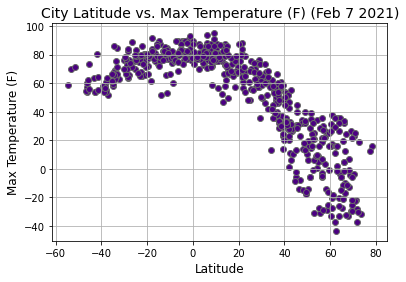

In [36]:
# Create scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o", facecolors="indigo", edgecolors="dimgrey")

# Add labels, title, limits & grid 
plt.title("City Latitude vs. Max Temperature (F) (Feb 7 2021)", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Display and Save plot
plt.savefig("../output_data/latitude-vs-temp.png")
plt.show()


The scatter plot above is a visual representation of the Max Temperature (in fahrenheit)\
based on the latitudes of cities in a random sample. This plot indicates that the cities\
closer to the equator (O degrees latitude) recorded a higher Max Temperature on average.

## Latitude vs. Humidity Plot

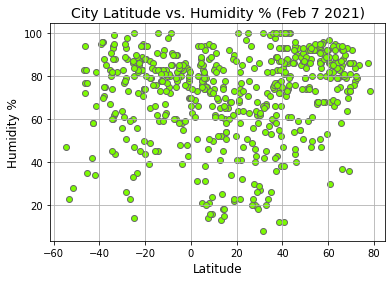

In [10]:
# Create scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", facecolors="lawngreen", edgecolors="dimgrey")

# Add labels, title, limits & grid 
plt.title("City Latitude vs. Humidity % (Feb 7 2021)", fontsize=14)
plt.ylabel("Humidity %", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Display and Save plot
plt.savefig("../output_data/latitude-vs-humidity.png")
plt.show()


The scatter plot above is a visual representation of the Humidity % \
based on the latitudes of cities in a random sample. This plot indicates that\
there is little to no correlation between latitude and recorded humidity %.

## Latitude vs. Cloudiness Plot

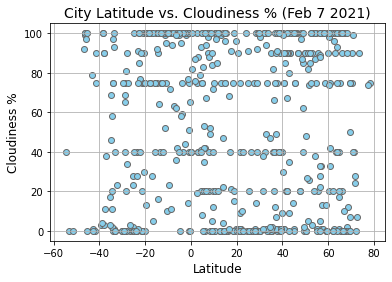

In [11]:
# Create scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o", facecolors="skyblue", edgecolors="dimgrey")

# Add labels, title, limits & grid 
plt.title("City Latitude vs. Cloudiness % (Feb 7 2021)", fontsize=14)
plt.ylabel("Cloudiness %", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Display and Save plot
plt.savefig("../output_data/latitude-vs-cloudiness.png")
plt.show()


The scatter plot above is a visual representation of the Cloud coverage \
based on the latitudes of cities in a random sample. This plot indicates that there is \
not a correlation between latitude and cloud coverage, however, it can be \
observed that the recorded units are biased towards a 0 or 100% record, with few in between.

## Latitude vs. Wind Speed Plot

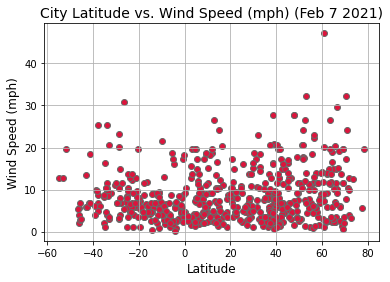

In [12]:
# Create scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o", facecolors="crimson", edgecolors="dimgrey")

# Add labels, title, limits & grid 
plt.title("City Latitude vs. Wind Speed (mph) (Feb 7 2021)", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Display and Save plot
plt.savefig("../output_data/latitude-vs-windspeed.png")
plt.show()


The scatter plot above is a visual representation of the Wind Speed (mph) \
based on the latitudes of cities in a random sample. This plot indicates that\
there is not a correlation between latitude and Wind Speed. Also, the outlier \
city shown at latitude 60 is not having a good time.

## Linear Regression

In [34]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

northern_hemisphere.head()

,City ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,{0},Slobozia,46.7281,29.7078,23.00,93,90,12.66,MD,2021-02-07 18:34:53
5,{5},Vestmannaeyjar,63.4427,-20.2734,35.60,87,40,26.46,IS,2021-02-07 18:34:53
6,{6},Poyarkovo,49.6000,128.6833,-17.45,87,0,7.58,RU,2021-02-07 18:34:54
8,{8},Sitka,57.0531,-135.3300,30.20,47,1,5.75,US,2021-02-07 18:34:54
10,{11},Thompson,55.7435,-97.8558,-31.00,68,90,18.41,CA,2021-02-07 18:34:54


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7700268074373533


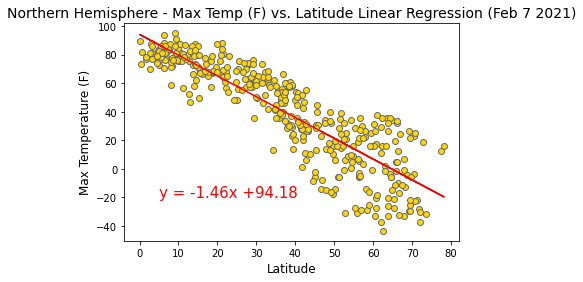

<Figure size 432x288 with 0 Axes>

In [32]:
# Create a Scatter Plot for max temperature vs latitude
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
plt.scatter(x_values,y_values, marker="o", facecolors="gold", edgecolors="dimgrey")
plt.title("Northern Hemisphere - Max Temp (F) vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (F)', fontsize=12)

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4323400587760085


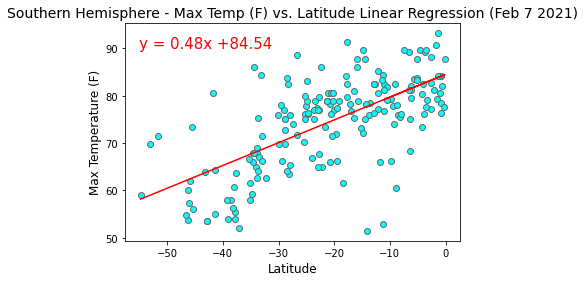

<Figure size 432x288 with 0 Axes>

In [30]:
# Create a Scatter Plot for max temperature vs latitude
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
plt.scatter(x_values,y_values, marker="o", facecolors="aqua", edgecolors="dimgrey")
plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (F)', fontsize=12)

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(-55, 90),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The regression plots above display the Maximum Temperatures (F) recorded\
and the correlation of the records based on the latitudes of cities in a \
random sample from the Northern Hemisphere and the Southern Hemisphere. \
The plots and regression models indicate that the maximum temperatures \
for cities closer to the equator (0 degrees latitude) are typically higher.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.09797831955968477


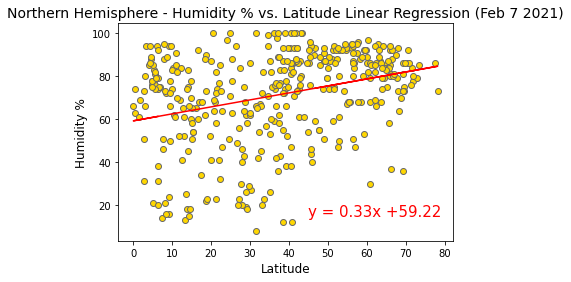

<Figure size 432x288 with 0 Axes>

In [29]:
# Create a Scatter Plot for humidity vs latitude
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
plt.scatter(x_values,y_values, marker="o", facecolors="gold", edgecolors="dimgrey")
plt.title("Northern Hemisphere - Humidity % vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity %', fontsize=12)

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.017054579132829786


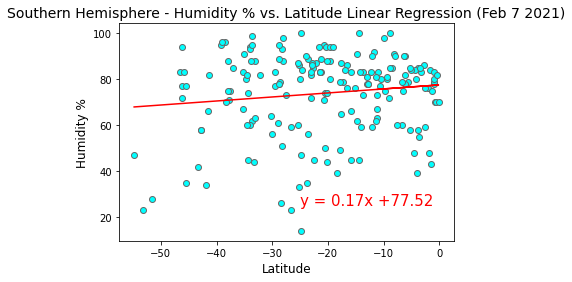

<Figure size 432x288 with 0 Axes>

In [28]:
# Create a Scatter Plot for humidity vs latitude
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
plt.scatter(x_values,y_values, marker="o", facecolors="aqua", edgecolors="dimgrey")
plt.title("Southern Hemisphere - Humidity % vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity %', fontsize=12)

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")

The regression plots above display the Humidity % recorded\
and the correlation of the records based on the latitudes of cities in a\
random sample from the Northern Hemisphere and the Southern Hemisphere.\
The plots and regression models indicate that there is not a strong correlation\
between latitude and humidity %.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.002687386575335637


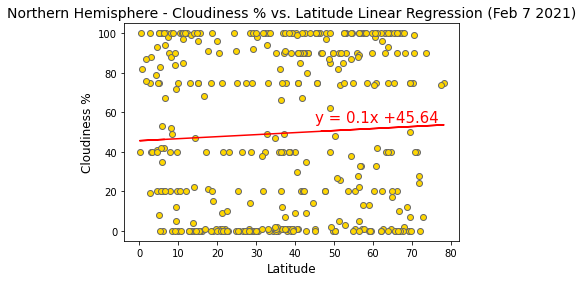

<Figure size 432x288 with 0 Axes>

In [26]:
# Create a Scatter Plot for cloudiness vs latitude
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
plt.scatter(x_values,y_values, marker="o", facecolors="gold", edgecolors="dimgrey")
plt.title("Northern Hemisphere - Cloudiness % vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness %', fontsize=12)

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(45,55),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08250007329075557


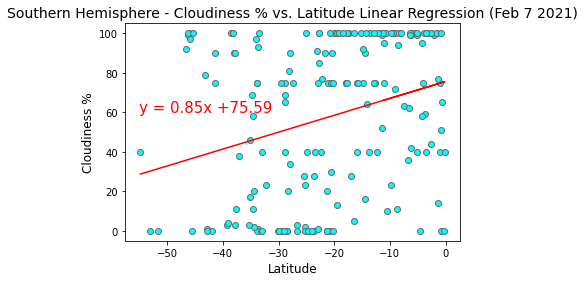

<Figure size 432x288 with 0 Axes>

In [24]:
# Create a Scatter Plot for cloudiness vs latitude
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
plt.scatter(x_values,y_values, marker="o", facecolors="aqua", edgecolors="dimgrey")
plt.title("Southern Hemisphere - Cloudiness % vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness %', fontsize=12)

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

The regression plots above display the Cloud coverage recorded\
and the correlation of the records based on the latitudes of cities in a\
random sample from the Northern Hemisphere and the Southern Hemisphere.\
The plots and regression models indicate that the 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02239736330896803


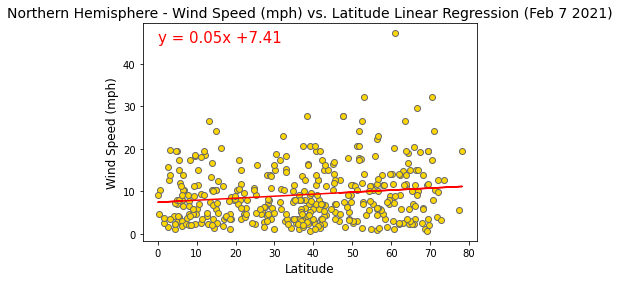

<Figure size 432x288 with 0 Axes>

In [23]:
# Create a Scatter Plot for wind speed vs latitude
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
plt.scatter(x_values,y_values, marker="o", facecolors="gold", edgecolors="dimgrey")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (mph)', fontsize=12)

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(0, 45),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04807329434600718


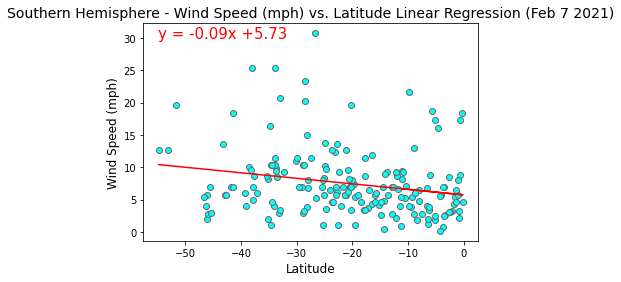

<Figure size 432x288 with 0 Axes>

In [22]:
# Create a Scatter Plot for wind speed vs latitude
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
plt.scatter(x_values,y_values, marker="o", facecolors="aqua", edgecolors="dimgrey")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (mph)', fontsize=12)

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")